Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 33 seconds.


95% HD interval:  [1.27423102 9.48185112]
mean: 5.005424174044844 median: 4.6774841433639445 std: 2.2365944534218904


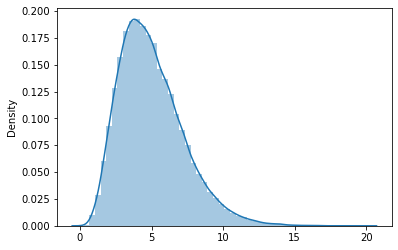

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import numpy as np

with pm.Model():
    s = pm.Uniform('s',0,10**7) # s = prior
    likelihood = pm.Poisson('likelihood',mu = s,observed=4)
    trace = pm.sample(20000)
tracee = trace ['s']
a = az.hdi(tracee,hdi_prob=0.95, round_to = 2)
b = [np.mean(tracee),np.median(tracee),np.std(tracee)]
print ('95% HD interval: ',a)
print ('mean:',b[0], 'median:',b[1],'std:',b[2])
sns.distplot(tracee)
plt.show()